In [1]:
#all imports
import math as m
import numpy as np
import pandas as pd
import copy

In [2]:
#Define my class with all the information collected from each point

class Points():
    
    def __init__(self, params):
        self.name = params[0]
        self.x = int(params[5])
        self.y = int(params[6])
        self.pos = (self.x,self.y)
        self.x_drift = int(params[3])
        self.y_drift = int(params[4])
        self.group = params[7]
        self.explosion = params[8]

        if params[9] == "minimal":     #there is almost no noise
            self.noise = 0
        elif params[9] == "little":    #there is some noise, but not in the areas where I see peaks
            self.noise = 1
        elif params[9] == "a bit":     #there is some noise and could affect the peaks a little
            self.noise = 2
        else:
            self.noise = 3             #there is noise, but barely not enough for me to ignore the results

        self.pot_diff = (float(params[10]),float(params[11]))
        self.peaks = []

        leftovers = params[12::]
        for i in range(len(leftovers)):
            if leftovers[i] != '':
                self.peaks.append(float(leftovers[i]))
        
        #to use later when implementing a data submission form
        #self.x_original = params[1]     
        #self.y_original = params[2]
        #self.x = self.x_original - self.x_drift
        #self.y = self.y_original - self.y_drift

    def __repr__(self):
        return "Point " + self.name + " at position " + str(self.pos) + " with peaks " + str(self.peaks)
    
    def __str__(self):
        return "Point " + self.name
    
    def info(self):
        print( self.name + "\n" + "Position: " + str(self.pos) + '\n' + "Peaks: " + str(self.peaks) + '\n' + "Drift(x,y): " + '(' + str(self.x_drift) +','+ str(self.y_drift) + ')' + "   Noise level: " +str(self.noise) + "\n" + "Potential difference: " + str(self.pot_diff) + '\n' + "Explosion: " + self.explosion + "   Group: " + self.group + '\n' )
        return
    
    def __sub__(self,other):          #for distance between points
        dist_x = self.x - other.x
        dist_y = self.y - other.y
        magnitude = m.sqrt(dist_x**2 + dist_y**2)
        return magnitude
    
    
class Defect():
    
    def __init__(self,params):
        self.name = params[0]
        self.x = params[1]
        self.y = params[2]
        self.pos = (self.x,self.y)

    def __sub__(self,other):          #for distance between point and the defect, for specific range graphing
        dist_x = self.x - other.x
        dist_y = self.y - other.y
        magnitude = m.sqrt(dist_x**2 + dist_y**2)
        return magnitude
    
    def __repr__(self):
        return self.name
    
    def __str__(self):
        return self.name + " at position " + str(self.pos)


In [38]:
global samples
samples = []

with open("Peak_data.csv") as file:
    for line in file:
        data = line.strip().split(',')
        try:
            if data[0][2] == '_':
                samples.append(Points(data))
        except:
            IndexError

global sel_samples
sel_samples = copy.deepcopy(samples)
global graph_num
graph_num = 0
            


In [33]:
#Alloted for data selection

def noise(sample_list,noise):
    temp = []
    for point in sample_list:
        if point.noise <= noise:
            temp.append(point)
    return temp

def explode(sample_list, explosion):
    temp = []
    if explosion == 'all':
        return sample_list
    
    for point in sample_list:
        if point.explosion == explosion:
            temp.append(point)
    return temp

def position(sample_list, min_val, max_val):
    temp = []
    for point in sample_list:
        if min_val <= point.y <= max_val:
            temp.append(point)
    return temp

def peaks(sample_list,min_peak,max_peak):
    temp = []
    for point in sample_list:
        deletions = []
        for peak in point.peaks:
            if max_peak < peak or peak < min_peak:
                deletions.append(peak)
                
        for item in deletions:
            point.peaks.remove(item)
                
        for peak in point.peaks:
            if min_peak <= peak <= max_peak:
                temp.append(point)
    return temp

def reset(sample_list):
    temp = copy.deepcopy(samples)
    return temp


In [61]:
#Alloted for Graphing
#To Do, non overlapping legend, work on more gradual color gradient, set third axes ticks invisible in side views
#%matplotlib notebook
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

def scatter3(sample_list):
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    plt.title('di/dv Peaks')
    ax.set_xlabel('y')
    ax.set_ylabel('x')
    ax.set_zlabel('Peak')
    fig.set_size_inches(16.5,8.5)     #18.5, 10.5)
    plt.yticks(np.arange(800,870,10))
    plt.xticks(np.arange(1925,2200,50))
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    
    x = []
    y = []
    z = []

    for point in sample_list:
        for peak in point.peaks:
            x.append(point.x)
            y.append(point.y)
            z.append(peak)
    ax.scatter(y,x,z)
    plt.show()
    return

def scatter_color(sample_list):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    plt.title('di/dv Peaks')
    ax.set_xlabel('y')
    ax.set_ylabel('x')
    ax.set_zlabel('Peak')
    fig.set_size_inches(16.5,8.5)     #18.5, 10.5)
    plt.yticks(np.arange(800,870,10))
    plt.xticks(np.arange(1925,2200,50))
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    
    x = []
    y = []
    z = []
    for point in sample_list:
        for peak in point.peaks:
            x.append(point.y)
            y.append(point.x)
            z.append(peak)

    ax.scatter(x,y,z, 'z',c = z, cmap=plt.cm.jet) #spring,viridis,plasma,jet
    plt.show()
    return

def scatter_color_chunk(sample_list): #will only work with a full data set

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    plt.title('di/dv Peaks')
    ax.set_xlabel('y')
    ax.set_ylabel('x')
    ax.set_zlabel('Peak')
    fig.set_size_inches(16.5,8.5)     #18.5, 10.5)
    plt.yticks(np.arange(800,870,10))
    plt.xticks(np.arange(1925,2200,50))
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    
    for point in sample_list:
        for peak in point.peaks:
            if 0 < peak <= .3:
                color = 'm'
                name = '0 -.3'
                purple = ax.scatter(point.y, point.x, peak,'z',c = color, label = name)

            elif .3 < peak <= .5:
                color = 'b'
                name = '.3 -.5'
                blue = ax.scatter(point.y, point.x, peak,'z',c = color, label = name)

            elif .5 < peak <= .6:
                color = 'g'
                name = '.5 -.6'
                green = ax.scatter(point.y, point.x, peak,'z',c = color, label = name)
            elif .6 < peak <= .7:
                color = 'y'
                name = '.6 -.7'
                yellow = ax.scatter(point.y, point.x, peak,'z',c = color, label = name)
            elif .7 < peak <= .8:
                color = 'C1'
                name = '.7 -.8'
                orange = ax.scatter(point.y, point.x, peak,'z',c = color, label = name)
            else:
                color = 'r'
                name = '.8 <'
                red = ax.scatter(point.y, point.x, peak,'z',c = color, label = name)
            
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1.)
    ax.legend(handles=[red, orange, yellow, green, blue, purple])
    plt.show()
    return

def scatter_angle(sample_list, rotation, elevation):
    
    fig = plt.figure()
    fig.set_size_inches(16.5,8.5)     #18.5, 10.5)
    ax = fig.add_subplot(111, projection='3d')
    
    plt.title('di/dv Peaks')
    ax.set_xlabel('y')
    ax.set_ylabel('x')
    ax.set_zlabel('Peak')
    
    x = []
    y = []
    z = []

    for point in sample_list:
        for peak in point.peaks:
            x.append(point.x)
            y.append(point.y)
            z.append(peak)
    ax.scatter(y,x,z)
    
    ax.azim = rotation #0 for x view, -90 for y view
    ax.elev = elevation #-90 for top view
    
    if rotation == 0:
        plt.title('di/dv Peaks -  x Side View')
    if rotation == -90:
        plt.title('di/dv Peaks -  y Side View')
    if elevation == -90:
        plt.title('di/dv Peaks - Top View')
        fig.set_size_inches(8.5,16.5)

    plt.yticks(np.arange(800,870,10))
    plt.xticks(np.arange(1925,2200,50))
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.show()
    return

def scatter_color_angle(sample_list, rotation, elevation):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    plt.title('di/dv Peaks')
    ax.set_xlabel('y')
    ax.set_ylabel('x')
    ax.set_zlabel('Peak')
    fig.set_size_inches(16.5,8.5)     #18.5, 10.5)
    plt.yticks(np.arange(800,870,10))
    plt.xticks(np.arange(1925,2200,50))
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    
    x = []
    y = []
    z = []
    for point in sample_list:
        for peak in point.peaks:
            x.append(point.y)
            y.append(point.x)
            z.append(peak)

    ax.scatter(x,y,z, 'z',c = z, cmap=plt.cm.jet)
    
    ax.azim = rotation #0 for x view, -90 for y view
    ax.elev = elevation #-90 for top view
    
    if rotation == 0:
        plt.title('di/dv Peaks -  x Side View')
    if rotation == -90:
        plt.title('di/dv Peaks -  y Side View')
    if elevation == -90:
        plt.title('di/dv Peaks - Top View')
        fig.set_size_inches(8.5,16.5)

    plt.show()
    return

#scatter_angle(samples,0,0) #x view, side
#scatter_angle(samples,-90,0) #y view, side
#scatter_angle(samples,0,-90) #x view, top

In [67]:
#Alloted for GUI Back end

from ipywidgets import widgets, interact, interactive, fixed, interact_manual
from IPython.display import display
from IPython.display import clear_output
#from __future__ import print_function
import warnings
warnings.filterwarnings('ignore')

sel_samples = copy.deepcopy(samples)

#current current_graph options;
#     1: classic graph
#     2: classic graph, colors separated by peak value
#     3: angle view, above view
#     4: angle view, side view
#     5: angle view with color, side view

def current_graph(num,sample_list):
    if num == 1:
        graph = scatter3(sample_list)
    elif num == 2:
        graph = scatter_color(sample_list)
    elif num == 3:
        graph = scatter_angle(sample_list,0,-90)
    elif num == 4:
        graph = scatter_angle(sample_list,-90,0)
    elif num == 5:
        graph = scatter_color_angle(sample_list,-90,0)
    elif num == 6:
        graph = scatter_color_angle(sample_list,0,-90)
    elif num == 7:
        graph = scatter_angle(sample_list,0,0)
    elif num == 8:
        graph = scatter_color_angle(sample_list,0,0)
        
    return num

#functions to call the choice functions because the button widget does not allow for paramater input

def call_function(sender):     #user input function
    user_input = sender.value
    print(user_input)  
    return

def graph1(val):
    clear_output()
    global graph_num
    graph_num = current_graph(1,sel_samples)
    return
    
def graph2(val):
    clear_output()
    global graph_num
    graph_num = current_graph(2,sel_samples)
    return

def graph3(val):
    clear_output()
    global graph_num
    graph_num = current_graph(3,sel_samples)
    return

def graph4(val):
    clear_output()
    global graph_num
    graph_num = current_graph(4,sel_samples)
    return

def graph5(val):
    clear_output()
    global graph_num
    graph_num = current_graph(5,sel_samples)
    return

def graph6(val):
    clear_output()
    global graph_num
    graph_num = current_graph(6,sel_samples)
    return

def graph7(val):
    clear_output()
    global graph_num
    graph_num = current_graph(7,sel_samples)
    return

def graph8(val):
    clear_output()
    global graph_num
    graph_num = current_graph(8,sel_samples)
    return

def refine1(name,new):
    if new == 'minimal':
        x = 0
    elif new == 'a little':
        x = 1
    elif new == 'moderate':
        x = 2
    else:
        x = 3
    temp = noise(sel_samples,x)
    global sel_samples
    sel_samples = temp
    return    

def refine2(name,new):
    if new == 'all':
        temp = explode(sel_samples,'all')
    elif new == 'before':
        temp = explode(sel_samples,'pre+')
    else:
        temp = explode(sel_samples,'post')
    global sel_samples
    sel_samples = temp
    return

def refine3(sender):
    clear_output()
    choice = position_filter.value.split(',')
    temp = position(sel_samples,int(choice[0]),int(choice[1]))
    current_graph(graph_num,temp)
    global sel_samples
    sel_samples = temp
    return

def refine4(sender):
    clear_output()
    choice = peak_range.value.split(',')
    temp = peaks(sel_samples,float(choice[0]),float(choice[1]))
    current_graph(graph_num,temp)
    global sel_samples
    sel_samples = temp
    return

def refine5(val):
    clear_output()
    temp = reset(samples)
    current_graph(graph_num,temp)
    global sel_samples
    sel_samples = temp
    return

def apply(val):
    clear_output()
    current_graph(graph_num,sel_samples)
    return


#for user input selection process
#text = widgets.Text()
#input_field = widgets.Text()
#display(text)
#input_field.on_submit(call_function)

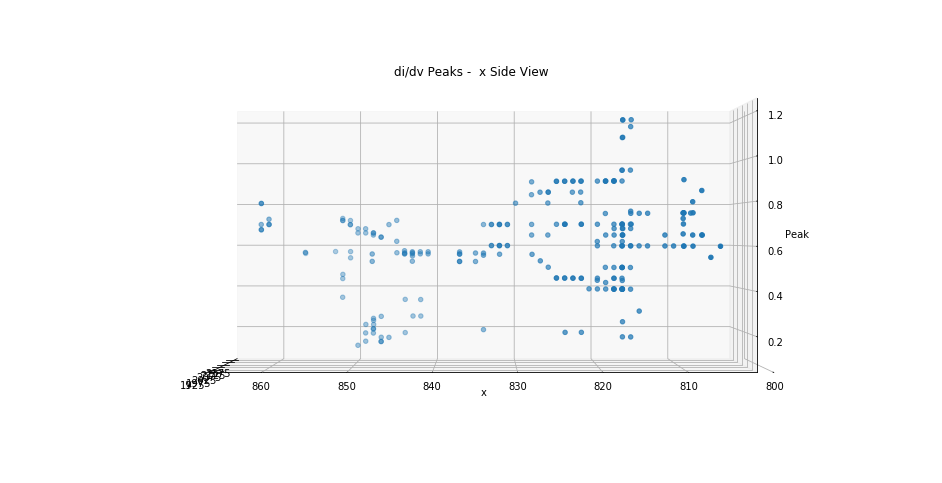

In [68]:
#Alloted for GUI Front End

#Title

#graph buttons
but1 = widgets.Button(description='Scatter Plot',button_style='info')
but2 = widgets.Button(description='Color Scatter Plot',button_style='info')
but3 = widgets.Button(description='Side View',button_style='info')
but4 = widgets.Button(description='Top View',button_style='info')
but5 = widgets.Button(description='Color Side View',button_style='info')
but6 = widgets.Button(description='Color Top View',button_style='info')
but7 = widgets.Button(description='Side View(x)',button_style='info')
but8 = widgets.Button(description='Color Side View(x)',button_style='info')


#data refinement buttons
but_apply = widgets.Button(description='Apply Filter',button_style='success')
but11 = widgets.Button(description='Reset',button_style='warning')
noise_filter = widgets.Dropdown(options=['all points','moderate','a little','minimal'],description='noise')
pre_post = widgets.Dropdown(options=['all','before','after'],description='Explosion')
position_filter =  widgets.Text(description='Select Range [min,max]')
peak_range = widgets.Text(description="Peak Range [min,max]")

#display buttons
display(widgets.HBox((but1,but3,but4,but2,but5,but6)))
display(widgets.HBox((noise_filter,pre_post,but_apply,but7)))
display(widgets.HBox((position_filter,peak_range,but11,but8)))


#button functions
but1.on_click(graph1)
but2.on_click(graph2)
but3.on_click(graph4)
but4.on_click(graph3)
but5.on_click(graph5)
but6.on_click(graph6)
but7.on_click(graph7)
but8.on_click(graph8)
but10.on_click(refine4)
but11.on_click(refine5)
but_apply.on_click(apply)
noise_filter.on_trait_change(refine1,'value')
pre_post.on_trait_change(refine2,'value')
position_filter.on_submit(refine3)
peak_range.on_submit(refine4)


#add an apply filter button

In [20]:
#Alloted for data submission

In [21]:
#Alloted for data storage

In [22]:
#Alloted for testing

In [23]:
#Alloted for holding code

#wireframe basics
#x = []
#y = []
#z = []
#x.append(point.x)
#y.append(point.y)
#z.append(peak)
#fig2 = plt.figure()
#ax2 = fig.add_subplot(111,projection='3d')
#ax2.plot_wireframe(x,y,z)

#for angle in range(0, 360):
#    ax.view_init(30, angle)
#    plt.draw()
#    plt.pause(.001)

#class testing
#Testing out my imported data
print("length of samples list: ",len(samples))
test = samples[33]
print("print(test) --> ",test)
print("test.info() --> see below",'\n')
test.info()
#testing out defect and distance
defect_1 = Defect(['defect_1',850,2150])
print("Specify location of possible defect: ",defect_1)
dist = defect_1 - samples[33]
print("Find distance between point and the defect: ",dist)

#graph testing
#graph1 = scatter3(sel_samples)          #classic graph
#graph2 = scatter_color(sel_samples)     #colors separated by peak value
#graph3 = scatter_angle(sel_samples,-90)  #above view
#graph4 = scatter_angle(sel_samples,0)    #side view
#graph5 = scatter_color_angle(sel_samples,0)   #color side view

#gui testing
#testing
#print('first graph, sets the graph_num value')
#graph_num = current_graph(2,sel_samples)
#print('first refine, graphs with only minimal noise(noise level 0)')
#sel_samples = refine(1,graph_num,sel_samples,0,0)
#print('second refine, graphs only points before tip explosion')
#sel_samples = refine(2,graph_num,sel_samples,'pre+',0)
#print('reset')
#sel_samples = refine(5,graph_num,samples,0,0)
#print('first refine, graphs only points in the range 2050 and 2025') #weird shape, but works, fix later
#sel_samples = refine(3,graph_num,sel_samples,2025,2050)
#print('second refine, graphs only peaks in the range .5 and .6')
#sel_samples = refine(4,graph_num,sel_samples,.5,.6)
#print('change graph angle')
#graph_num = current_graph(4,sel_samples)


In [214]:
#Alloted for testing
